<IPython.core.display.Javascript object>


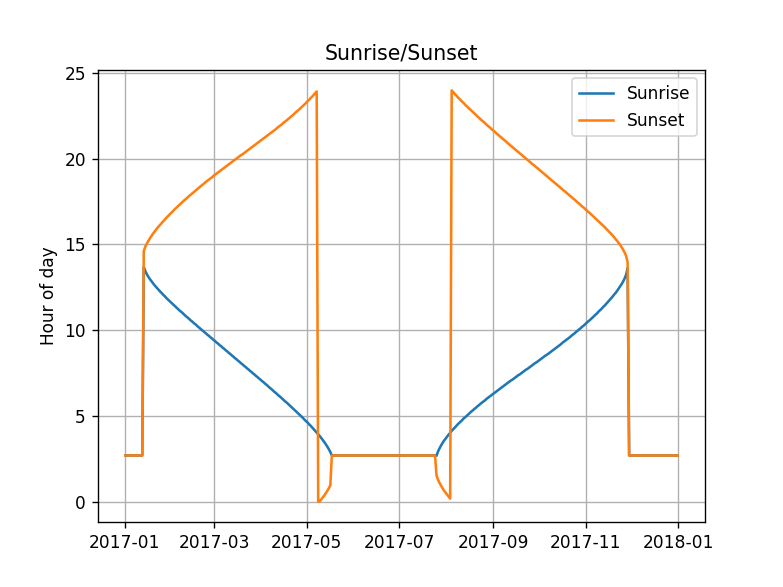

<IPython.core.display.Javascript object>


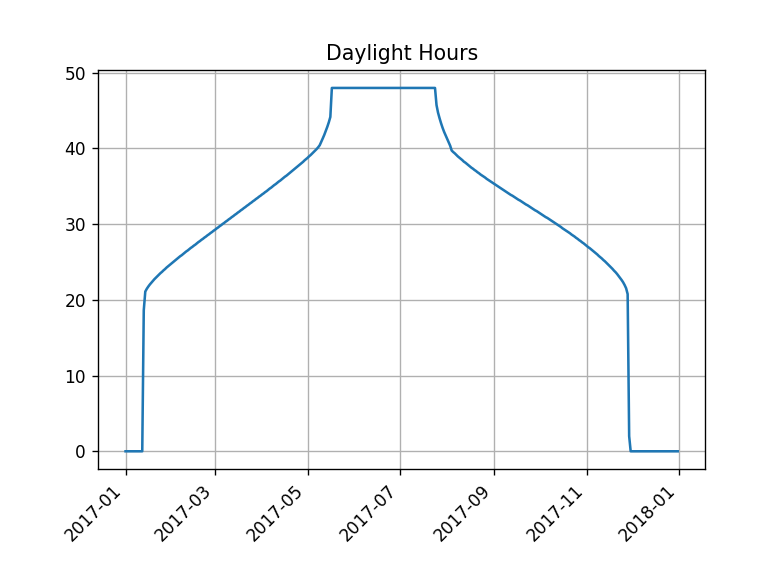

In [28]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib notebook

Filename = 'sun-calculator.csv'
Hemisphere = 'N'
Offset = 1

Sun = pd.read_csv(Filename).replace('--:--','02:42')
Sun['Noon'] = pd.to_datetime(Sun['Date']+' '+Sun['Local noon'])
Sun['SunSet'] = pd.to_datetime(Sun['Date']+' '+Sun['Sun set'])
Sun['SunRise'] = pd.to_datetime(Sun['Date']+' '+Sun['Sun rise'])
plt.figure()
plt.plot(Sun['Noon'],Sun['SunRise'].dt.hour+Sun['SunRise'].dt.minute/60,label = 'Sunrise')
plt.plot(Sun['Noon'],Sun['SunSet'].dt.hour+Sun['SunSet'].dt.minute/60,label = 'Sunset')
plt.grid()
plt.ylabel('Hour of day')
plt.legend()
plt.title('Sunrise/Sunset')

Sun['DOY'] = Sun['Noon'].dt.dayofyear
Sun = Sun.set_index(pd.DatetimeIndex(pd.to_datetime(Sun['Date'])),drop=True)
Sun.index = Sun.index
Sun30 = Sun.resample('30T').ffill()
Sun1 = Sun.resample('1T').ffill()
Sun1['Daytime'] = 0
Sun1.loc[(((Sun1.index<=Sun1['SunSet'])&(Sun1['SunSet'].dt.hour<=12))|
          ((Sun1.index>=Sun1['SunSet'])&(Sun1.index>=Sun1['SunRise']))|
          ((Sun1.index<=Sun1['SunSet'])&(Sun1.index>=Sun1['SunRise']))|
           (Sun1['SunSet']==Sun1['SunRise'])),'Daytime']+=1
if Hemisphere == 'N':
    Sun1.loc[((Sun1['SunSet']==Sun1['SunRise'])&
           ((Sun1['SunSet'].dt.month<3)|(Sun1['SunSet'].dt.month>9))),'Daytime']-=1
else:
    Sun1.loc[((Sun1['SunSet']==Sun1['SunRise'])&
           ((Sun1['SunSet'].dt.month>3)&(Sun1['SunSet'].dt.month<9))),'Daytime']-=1

Sun1.index = Sun1.index +timedelta(hours=Offset)
Sun1.SunRise = Sun1.SunRise +timedelta(hours=Offset)
Sun1.SunSet = Sun1.SunSet +timedelta(hours=Offset)

Sun30['Daytime'] = Sun1['Daytime'].resample('30T').mean()
fig = plt.figure()
plt.title('Daylight Hours')
plt.plot(Sun30['Daytime'].resample('D').sum())
plt.grid()
fig.autofmt_xdate(rotation=45)


Sun30[['Daytime','SunRise','SunSet']].to_csv('Daytime.csv')

In [1]:
from openpyxl import Workbook
wb = Workbook()

# grab the active worksheet
ws = wb.active

# Data can be assigned directly to cells
ws['A1'] = 42

# Rows can also be appended
ws.append([1, 2, 3])

# Python types will automatically be converted
import datetime
ws['A2'] = datetime.datetime.now()

# Save the file

In [220]:
import pandas as pd
import numpy as np
# from openpyxl import load_workbook
# wb2 = load_workbook('SolarAngle_2009.xlsx')

# print(wb2.sheetnames)
# ws = wb2.active
print(ws['b2'].value)

69.36666


In [269]:
LAT = 69.36666
TZ = -7
TIME = 14/24
LON = -134.86

JD = 2457927.5
# Time = 14

F2 = JD+TIME/24-TZ/24 ## Use PD.to_julian
G2 = (F2-2451545)/36525 #Julian Century

I2 = (280.46646+G2*(36000.76983 + G2*0.0003032))%360 #Geom Mean Long Sun (deg)
J2 = 357.52911+G2*(35999.05029 - 0.0001537*G2)#Geom Mean Anom Sun (deg)
K2 = 0.016708634-G2*(0.000042037+0.0000001267*G2)#Eccent Earth Orbit
L2 = np.sin(np.radians(J2))*(1.914602-G2*(0.004817+0.000014*G2))+np.sin(np.radians(2*J2))*(0.019993-0.000101*G2)+np.sin(np.radians(3*J2))*0.000289 #Sun Eq of Ctr
M2 = I2+L2 #Sun True Long (deg)
N2 = J2+L2 #Sun True Anom (deg)
O2 = (1.000001018*(1-K2*K2))/(1+K2*np.cos(np.radians(N2))) #Sun Rad Vector (AUs)
P2 = M2-0.00569-0.00478*np.sin(np.radians(125.04-1934.136*G2)) #Sun App Long (deg)
Q2 = 23+(26+((21.448-G2*(46.815+G2*(0.00059-G2*0.001813))))/60)/60 #Mean Obliq Ecliptic (deg)
R2 = Q2+0.00256*np.cos(np.radians(125.04-1934.136*G2)) #Obliq Corr (deg)
S2 = np.radians(np.arctan2(np.cos(np.radians(R2))*np.sin(np.radians(P2)),np.cos(np.radians(P2)))) #Sun Rt Ascen (deg)
T2 = np.degrees(np.arcsin(np.sin(np.radians(R2))*np.sin(np.radians(P2)))) #Sun Declin (deg)
U2 = np.tan(np.radians(R2/2))*np.tan(np.radians(R2/2))# var y
V2 = 4*np.degrees(U2*np.sin(2*np.radians(I2))-2*K2*np.sin(np.radians(J2))+4*K2*U2*np.sin(np.radians(J2))*np.cos(2*np.radians(I2))-0.5*U2*U2*np.sin(4*np.radians(I2))-1.25*K2*K2*np.sin(2*np.radians(J2))) #Eq of Time (minutes)
W2 = np.degrees(np.arccos(np.cos(np.radians(90.833))/(np.cos(np.radians(LAT))*np.cos(np.radians(T2)))-np.tan(np.radians(LAT))*np.tan(np.radians(T2)))) #HA Sunrise (deg)

X2 = (720-4*LON-V2+TZ*60)/1440 #Solar Noon (LST)
Y2 = (X2*1440-W2*4)/1440 #Sunrise Time (LST)
Z2 = (X2*1440+W2*4)/1440 #Sunset Time (LST)

AA2=8*W2 #Sunlight Duration (minutes)
AB2=(TIME*1440+V2+4*LON-60*TZ)%1440 # True Solar Time (min)

if AB2/4<0:
    AC2=AB2/4+180# Hour Angle (deg)
else:
    AC2=AB2/4-180# Hour Angle (deg)

AD2 = np.degrees(np.arccos(np.sin(np.radians(LAT))*np.sin(np.radians(T2))+np.cos(np.radians(LAT))*np.cos(np.radians(T2))*np.cos(np.radians(AC2))))# Solar Zenith Angle (deg)

# np.degrees(ACOS(SIN(np.radians($B$2))*SIN(np.radians(T2))+COS(np.radians($B$2))*COS(np.radians(T2))*COS(np.radians(AC2))))

AE2 = 90-AD2 #Solar Elevation Angle (deg)
AF2 = 0/3600
if AE2>85:
    AF2 = 0
elif AE2>5:
    AF2 = 58.1/np.tan(np.radians(AE2))-0.07/((np.tan(np.radians(AE2)))**3)+0.000086/(np.tan(np.radians(AE2))**5)
elif AE2>-0.575:
    AF2 = 1735+AE2*(-518.2+AE2*(103.4+AE2*(-12.79+AE2*0.711)))
else:
    AF2 = -20.772/np.tan(np.radians(AE2))
AF2/=3600#pprox Atmospheric Refraction (deg)
Elevation = AE2+AF2 #Solar Elevation corrected for atm refraction (deg)

if AC2>0:
    Azimuth = (np.degrees(np.arccos(((np.sin(np.radians(LAT))*np.cos(np.radians(AD2)))-np.sin(np.radians(T2)))/(np.cos(np.radians(LAT))*np.sin(np.radians(AD2)))))+180)%360
else:
    Azimuth = (540-np.degrees(np.arccos(((np.sin(np.radians(LAT))*np.cos(np.radians(AD2)))-np.sin(np.radians(T2)))/(np.cos(np.radians(LAT))*np.sin(np.radians(AD2))))))%360
# Solar Azimuth Angle (deg cw from N)
print(Elevation,
Azimuth)

print(ws['$AG2'].value.replace('=',''))
print(ws['$AG1'].value)
print()



44.06844478750685 179.46532362952246
AE2+AF2
Solar Elevation corrected for atm refraction (deg)



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in arccos


In [77]:
for i in range(2009,2019):
#     while
    wb = load_workbook('SolarAngle.xlsx')
    ws = wb.active
    ws['b6']=i
    print(ws['b6'].value)
    wb.save("SolarAngle_"+str(i)+".xlsx")

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [83]:
# print(ws['k44'].internal_value )
# print(ws.cell(row=10, column=6).value)
# pd.read_excel("SolarAngle_"+str(i)+".xlsx", sheet_name=wb.sheetnames)#, header=0, index_col='Date')
# df = pd.read_csv("SolarAngle_"+str(2009)+".csv",parse_dates=['Date'])
# df = df.set


## creating a csv file
csv = open("data.csv", "w+")

for row in ws.rows:
    l = list(row)
    print(l)
    for i in range(len(l)):
        if i == len(l) - 1:
            csv.write(str(l[i].value))
        else:
            csv.write(str(l[i].value) + ',')
        csv.write('\n')

## close the csv file
csv.close()

[<Cell 'Calculations'.A1>, <MergedCell 'Calculations'.B1>, <MergedCell 'Calculations'.C1>, <Cell 'Calculations'.D1>, <Cell 'Calculations'.E1>, <Cell 'Calculations'.F1>, <Cell 'Calculations'.G1>, <Cell 'Calculations'.H1>, <Cell 'Calculations'.I1>, <Cell 'Calculations'.J1>, <Cell 'Calculations'.K1>, <Cell 'Calculations'.L1>, <Cell 'Calculations'.M1>, <Cell 'Calculations'.N1>, <Cell 'Calculations'.O1>, <Cell 'Calculations'.P1>, <Cell 'Calculations'.Q1>, <Cell 'Calculations'.R1>, <Cell 'Calculations'.S1>, <Cell 'Calculations'.T1>, <Cell 'Calculations'.U1>, <Cell 'Calculations'.V1>, <Cell 'Calculations'.W1>, <Cell 'Calculations'.X1>, <Cell 'Calculations'.Y1>, <Cell 'Calculations'.Z1>, <Cell 'Calculations'.AA1>, <Cell 'Calculations'.AB1>, <Cell 'Calculations'.AC1>, <Cell 'Calculations'.AD1>, <Cell 'Calculations'.AE1>, <Cell 'Calculations'.AF1>, <Cell 'Calculations'.AG1>, <Cell 'Calculations'.AH1>, <Cell 'Calculations'.AI1>]
[<Cell 'Calculations'.A2>, <Cell 'Calculations'.B2>, <Cell 'Calculat

[<Cell 'Calculations'.A205>, <Cell 'Calculations'.B205>, <Cell 'Calculations'.C205>, <Cell 'Calculations'.D205>, <Cell 'Calculations'.E205>, <Cell 'Calculations'.F205>, <Cell 'Calculations'.G205>, <Cell 'Calculations'.H205>, <Cell 'Calculations'.I205>, <Cell 'Calculations'.J205>, <Cell 'Calculations'.K205>, <Cell 'Calculations'.L205>, <Cell 'Calculations'.M205>, <Cell 'Calculations'.N205>, <Cell 'Calculations'.O205>, <Cell 'Calculations'.P205>, <Cell 'Calculations'.Q205>, <Cell 'Calculations'.R205>, <Cell 'Calculations'.S205>, <Cell 'Calculations'.T205>, <Cell 'Calculations'.U205>, <Cell 'Calculations'.V205>, <Cell 'Calculations'.W205>, <Cell 'Calculations'.X205>, <Cell 'Calculations'.Y205>, <Cell 'Calculations'.Z205>, <Cell 'Calculations'.AA205>, <Cell 'Calculations'.AB205>, <Cell 'Calculations'.AC205>, <Cell 'Calculations'.AD205>, <Cell 'Calculations'.AE205>, <Cell 'Calculations'.AF205>, <Cell 'Calculations'.AG205>, <Cell 'Calculations'.AH205>, <Cell 'Calculations'.AI205>]
[<Cell 'Ca

In [91]:
import xlrd
sheet = xlrd.open_workbook("SolarAngle_"+str(2010)+".xlsx")
print(sheet)#.sheet_by_index(0)

In [90]:
# print(sheet)
# for row in range(sheet.nrows):
#     print(row)

0
1
2
3
4
5
